# Работа с PostgreSQL

In [2]:
import psycopg2
import pandas as pd

# Параметры подключения
dbname = "postgres"
user = "postgres" # укажите логин, указанный при установке PostgreSQL сервера
password = "1904" # и пароль
host = "localhost"
port = "5432"

# Подключение к базе данных
conn = psycopg2.connect(dbname=dbname, user=user, password=password, host=host, port=port)

# Создание курсора
cursor = conn.cursor()

# Выполнение SQL-запроса для получения данных из таблицы
sql = "SELECT * FROM test"
cursor.execute(sql)

# Извлечение данных и преобразование в датафрейм
df = pd.DataFrame(cursor.fetchall())
columns = [desc[0] for desc in cursor.description]
df.columns = columns

# Закрытие курсора и подключения
cursor.close()
conn.close()

# Вывод датафрейма
print(df)

      a  b
0  str1  1
1  str2  2


Курсор — особый объект библиотеки psycopg2, используется для выполнения SQL-запросов и получения результатов.

Метод fetchall() возвращает все строки в виде списка кортежей. Мы используем библиотеку Pandas для преобразования этих данных в DataFrame.

После завершения работы с базой данных важно закрыть курсор и соединение для освобождения ресурсов.

In [3]:
dbname = "postgres"
user = "postgres" # укажите логин, указанный при установке PostgreSQL сервера
password = "1904" # и пароль
host = "localhost"
port = "5432"

# Подключение к базе данных
conn = psycopg2.connect(dbname=dbname, user=user, password=password, host=host, port=port)

# Создание курсора
cursor = conn.cursor()

# Выполнение SQL-запроса для получения данных из таблицы
sql = "SELECT * FROM mall_customers"
cursor.execute(sql)

# Извлечение данных и преобразование в датафрейм
df2 = pd.DataFrame(cursor.fetchall())
columns = [desc[0] for desc in cursor.description]
df2.columns = columns

# Закрытие курсора и подключения
cursor.close()
conn.close()

# Вывод датафрейма
print(df2)

     customerid   genre  age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [10]:
print(df2[df2['genre'] == 'Male'].count)

<bound method DataFrame.count of      customerid genre  age  Annual Income (k$)  Spending Score (1-100)
0             1  Male   19                  15                      39
1             2  Male   21                  15                      81
8             9  Male   64                  19                       3
10           11  Male   67                  19                      14
14           15  Male   37                  20                      13
..          ...   ...  ...                 ...                     ...
187         188  Male   28                 101                      68
192         193  Male   33                 113                       8
197         198  Male   32                 126                      74
198         199  Male   32                 137                      18
199         200  Male   30                 137                      83

[88 rows x 5 columns]>


In [19]:
conn = psycopg2.connect(dbname=dbname, user=user, password=password, host=host, port=port)

# Создание курсора
cursor = conn.cursor()

# Выполнение SQL-запроса для получения данных из таблицы
sql = "SELECT * FROM mall_customers WHERE Age > 25 AND Genre = 'Male'"
cursor.execute(sql)

# Извлечение данных и преобразование в датафрейм
df_male = pd.DataFrame(cursor.fetchall())
columns = [desc[0] for desc in cursor.description]
df_male.columns = columns

# Закрытие курсора и подключения
cursor.close()
conn.close()

# Вывод датафрейма
print(df_male)
print('Количество мужчин старше 25 лет:', df_male.shape[0])

    customerid genre  age  Annual Income (k$)  Spending Score (1-100)
0            9  Male   64                  19                       3
1           11  Male   67                  19                      14
2           15  Male   37                  20                      13
3           19  Male   52                  23                      29
4           21  Male   35                  24                      35
..         ...   ...  ...                 ...                     ...
65         188  Male   28                 101                      68
66         193  Male   33                 113                       8
67         198  Male   32                 126                      74
68         199  Male   32                 137                      18
69         200  Male   30                 137                      83

[70 rows x 5 columns]
Количество мужчин старше 25 лет: 70


# Выгрузка данных. Работа с CSV

In [17]:
# ПРОБЛЕМА КОДИРОВКИ ДАННЫХ
# для решения проблемы используем библиотеку Universal Encoding Detector
import pandas as pd
import chardet.universaldetector

# если мы указываем header=None, то первая срока исходного файла не будет расценена как строка заголовка 
data = pd.read_csv('data/ErrorEnCoding.csv.xls', header=None, encoding_errors = 'replace')
display(data)

,0,1,2
0,User_943,Accumanst@gmail.com,������
1,User_908,Advismowr@mail.ru,������
2,User_962,Anachso@ukr.net,���������
3,User_973,Antecia@inbox.ru,�����
4,User_902,Balliaryva@ukr.net,
...,...,...,...
95,User_959,UpdatesCurious@yahoo.com,������
96,User_901,V2artierso@mail.ru,�����������
97,User_970,Vashoterlo@bk.ru,�������
98,User_965,Visuareda@yahoo.com,�������


Выявлена проблема: при стандартном считывании содержимое файла читается некорректно. Необходимо указать кодировку файла при считывании.

In [16]:
# определим кодировку файла
# импортируем субмодуль chardet.universal
from chardet.universaldetector import UniversalDetector

detector = UniversalDetector()

with open('data/ErrorEnCoding.csv.xls', 'rb') as fh:
    for line in fh:
        detector.feed(line)
        if detector.done:
            break
print(detector.close())

{'encoding': 'KOI8-R', 'confidence': 0.8773902118791048, 'language': 'Russian'}


С достоверностью примерно 88 % тип используемой в файле кодировки — KOI8-R.

In [15]:
# повторим считывание файла уже со знанием кодировки
data = pd.read_csv('data/ErrorEnCoding.csv.xls', header=None, encoding='KOI8-R')
data

,0,1,2
0,User_943,Accumanst@gmail.com,Ижевск
1,User_908,Advismowr@mail.ru,Ижевск
2,User_962,Anachso@ukr.net,Краснодар
3,User_973,Antecia@inbox.ru,Пермь
4,User_902,Balliaryva@ukr.net,
...,...,...,...
95,User_959,UpdatesCurious@yahoo.com,Тюмень
96,User_901,V2artierso@mail.ru,Арзангелтск
97,User_970,Vashoterlo@bk.ru,Воронеж
98,User_965,Visuareda@yahoo.com,Воронеж


Большие по размеру CSV-файлы для экономии памяти часто «упаковывают» в архив, например ZIP.

Механизм, используемый в функции read_csv(), позволяет проводить чтение текстового файла из архива, не распаковывая его. Функция read_csv() сама распознает архив и извлекает из него данные (работает практически со всеми ZIP-архивами). Важно чтобы файл в ZIP-архиве был один.

In [14]:
# Также и наоборот можно упаковать данные в файл CSV, а далее в ZIP-архив

# Определяем параметры архивирования — метод сжатия, имя файла в архиве
compression_opts = dict(method='zip', archive_name='out.csv') 
data.to_csv('data/out.zip', index=False, compression=compression_opts)

# В ходе выполнения кода содержимое DataFrame сохранено в файле out.csv, файл упакован в архив out.zip.

# Работа с файлами Excel

In [13]:
grades = pd.read_excel('data/grades.xlsx')
grades.head()

,Student ID,Student name,Grade
0,1,Аня,8
1,2,Катя,9
2,3,Маша,7
3,4,Миша,4
4,5,Женя,8


Помимо ссылки на файл, в read_excel также можно передать номер листа - он по умолчанию 0 (загружает первый лист), можно написать 'Sheet X' и номер листа, можно указать None - в этом случае вернется словарь, где ключами будут номера листов, а значениями - их содержимое

na_values — список значений, которые будут считаться пропусками ( '', '#N/A', ' N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 'null').

Следует также учесть, что нормальное поведение Pandas — это считывание значений ячеек. Формулы из Excel-файла не считываются.

In [19]:
# выводятся данные с листа с названием ML
grades = pd.read_excel('data/grades.xlsx', sheet_name='ML')
grades

,Student ID,Student name,Grade
0,1,Аня,7
1,2,Катя,5
2,3,Маша,9
3,4,Миша,8
4,5,Женя,9
5,6,Оля,9
6,7,Витя,7
7,8,Дима,4
8,9,Витя,5


In [21]:
# Какую оценку получила Катя за экз по МЛ
grades[grades['Student name'] == 'Катя']['Grade']

1    5
Name: Grade, dtype: int64

In [22]:
# Какую оценку получил Миша за экз по математике
grades = pd.read_excel('data/grades.xlsx', sheet_name='Maths')
grades[grades['Student name']=='Миша']['Grade']

3    4
Name: Grade, dtype: int64

In [23]:
# Сохраняем данные из DataFrame grades в файл grades_new.xlsx (на листе 'Example') в папке data
grades.to_excel('data/grades_new.xlsx', sheet_name='Example', index=False)

# index=False означает, что не будет добавляться лишний столбец в таблице

In [24]:
ratings = pd.read_excel('data/ratings+movies.xlsx', sheet_name='ratings')
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [25]:
movies = pd.read_excel('data/ratings+movies.xlsx', sheet_name= 'movies')
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [26]:
# объединили два листа в одну таблицу по столбцу movieId
df = ratings.merge(movies, how='inner', on='movieId')
df

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,1494273047,Get Out (2017),Horror
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi


# Работа с JSON

In [27]:
import json
from pprint import pprint
# проводим десериализацию json-файла

with open('data/recipes.json.txt') as f:
    recipes = json.load(f)

pprint(recipes)

[{'cuisine': 'greek',
  'id': 10259,
  'ingredients': ['romaine lettuce',
                  'black olives',
                  'grape tomatoes',
                  'garlic',
                  'pepper',
                  'purple onion',
                  'seasoning',
                  'garbanzo beans',
                  'feta cheese crumbles']},
 {'cuisine': 'southern_us',
  'id': 25693,
  'ingredients': ['plain flour',
                  'ground pepper',
                  'salt',
                  'tomatoes',
                  'ground black pepper',
                  'thyme',
                  'eggs',
                  'green tomatoes',
                  'yellow corn meal',
                  'milk',
                  'vegetable oil']},
 {'cuisine': 'filipino',
  'id': 20130,
  'ingredients': ['eggs',
                  'pepper',
                  'salt',
                  'mayonaise',
                  'cooking oil',
                  'green chilies',
                  'grilled chicken bre

In [28]:
# узнаем id первого (индекс 0) блюда в списке
recipes[0]['id']

10259

In [35]:
# сколько ингредиентов входит в состав первого блюда
len(recipes[0]['ingredients'])

9

In [36]:
# к какой кухне относится блюдо с id 13121?
for dish in recipes:
    if dish['id'] == 13121:
        print(dish['cuisine'])

thai


In [37]:
# какое уникальное количество национальных кухонь?
# вариант со списком
mylist = []
for dish in recipes:
    if dish['cuisine'] in mylist:
        continue
    else:
        mylist.append(dish['cuisine'])
print(len(mylist))
        

20


In [38]:
# вариант с множеством
myset = set()
for dish in recipes:
    myset.add(dish['cuisine'])
print(len(myset))

20


In [44]:
# у какой кухни максимальное кол-во рецептов 
my_dict = {}
for dish in recipes:
    if dish['cuisine'] not in my_dict:
        my_dict[dish['cuisine']] = 1
    else:
        my_dict[dish['cuisine']] += 1
# my_dict.items() возвращает пары (ключ-значение), а lambda item: item[1] указывает, что сортировка происходит по значению
print(sorted(my_dict.items(), key=lambda item: item[1],reverse=True))

[('italian', 101), ('mexican', 79), ('southern_us', 52), ('indian', 41), ('chinese', 39), ('french', 25), ('japanese', 24), ('korean', 21), ('thai', 17), ('cajun_creole', 16), ('greek', 15), ('spanish', 12), ('filipino', 11), ('british', 9), ('vietnamese', 9), ('irish', 9), ('moroccan', 9), ('jamaican', 6), ('brazilian', 3), ('russian', 2)]


In [45]:
# файл json можно легко переформатировать в датафрейм
df = pd.DataFrame(recipes)
df.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [46]:
# аналогично считать json файл сразу в датафрейм (без предварительной десериализации) можно вот так

df = pd.read_json('data/recipes.json.txt')
df.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [47]:
df.info

<bound method DataFrame.info of         id      cuisine                                        ingredients
0    10259        greek  [romaine lettuce, black olives, grape tomatoes...
1    25693  southern_us  [plain flour, ground pepper, salt, tomatoes, g...
2    20130     filipino  [eggs, pepper, salt, mayonaise, cooking oil, g...
3    22213       indian                [water, vegetable oil, wheat, salt]
4    13162       indian  [black pepper, shallots, cornflour, cayenne pe...
..     ...          ...                                                ...
495   1121      chinese  [ground pepper, garlic, safflower oil, green o...
496  18376      italian  [penne, garlic, eggplant, lemon juice, olive o...
497  17815      italian  [cold water, dry white wine, fish fillets, cho...
498  32878  southern_us  [water, cajun seasoning, yellow onion, shrimp,...
499  24410      british  [mint, large eggs, heavy cream, berries, groun...

[500 rows x 3 columns]>

In [52]:
# создадим реестр всех игредиентов
unique_ingr  = set()
for dish in df['ingredients']:
    for ing in dish:
        unique_ingr.add(ing)
print('Количество уникальных ингредиентов:', len(unique_ingr))

Количество уникальных ингридиентов: 1318


In [53]:
# создадим функцию, которая будет перебирать ингредиенты из общего списка и смотреть, есть ли они в составе блюда 
# если да, возвращает 1, если нет - 0

def contains(ingredient_list):
    if ingredient_name in ingredient_list:
        return 1
    else:
        return 0

In [54]:
# применяем эту функцию на колонку с ингредиентами блюд

for ingredient_name in unique_ingr:
    df[ingredient_name]=df['ingredients'].apply(contains)

# а саму колонку с ингредиентами меняем на число продуктов в составе блюда

df['ingredients'] = df['ingredients'].apply(len)

df

/var/folders/50/18ts1bh12532xjz2xv95cl540000gn/T/ipykernel_17834/1885513899.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ingredient_name]=df['ingredients'].apply(contains)
/var/folders/50/18ts1bh12532xjz2xv95cl540000gn/T/ipykernel_17834/1885513899.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ingredient_name]=df['ingredients'].apply(contains)
/var/folders/50/18ts1bh12532xjz2xv95cl540000gn/T/ipykernel_17834/1885513899.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

,id,cuisine,ingredients,silken tofu,hass avocado,romaine lettuce,fava beans,caul fat,crushed tomatoes,mace,...,sticky rice,golden raisins,onion tops,berries,oil,zucchini,fat free yogurt,strong white bread flour,1% low-fat milk,sliced almonds
0,10259,greek,9,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,11,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20130,filipino,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22213,indian,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,indian,20,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1121,chinese,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,18376,italian,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,17815,italian,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,32878,southern_us,19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
# создадим список всех id-шек блюд (именно список, а не series)
ids = []
for i in df['id']:
    ids.append(i)
ids

[10259,
 25693,
 20130,
 22213,
 13162,
 6602,
 42779,
 3735,
 16903,
 12734,
 5875,
 45887,
 2698,
 41995,
 31908,
 24717,
 34466,
 1420,
 2941,
 8152,
 13121,
 40523,
 40989,
 29630,
 49136,
 26705,
 27976,
 22087,
 9197,
 1299,
 40429,
 34419,
 10276,
 33465,
 39250,
 37963,
 20051,
 11300,
 17610,
 37405,
 28302,
 31634,
 32304,
 36341,
 29369,
 27564,
 18515,
 3335,
 4499,
 4906,
 5767,
 30748,
 35930,
 44902,
 31119,
 3535,
 47028,
 38112,
 2646,
 5206,
 38233,
 39267,
 11913,
 20591,
 70,
 43928,
 8530,
 275,
 43769,
 49111,
 11886,
 45839,
 699,
 24568,
 8820,
 16582,
 9058,
 4715,
 29061,
 2107,
 22825,
 13758,
 6886,
 14874,
 43399,
 38254,
 41596,
 33989,
 17004,
 4969,
 31831,
 46648,
 36888,
 34471,
 25164,
 39600,
 46357,
 46905,
 8753,
 37337,
 17636,
 8997,
 28851,
 4635,
 7782,
 8031,
 49434,
 31318,
 31027,
 47095,
 4574,
 19757,
 35570,
 44812,
 27858,
 18624,
 9406,
 35132,
 33071,
 8321,
 20955,
 45776,
 6043,
 336,
 25751,
 793,
 34367,
 7406,
 7473,
 7532,
 5924,

# Контент XML-файла

XML=eXtensible Markup Language — расширяемый язык разметки

In [5]:
import xml.etree.ElementTree as ET

tree = ET.parse('data/menu.xml')

In [6]:
# получаем значение, которое лежит в корне
root = tree.getroot()
root

<Element 'menu' at 0x105846200>

In [7]:
# посмотрим тип этого объекта. такой тип будет у любого узла в дереве
type(root)

xml.etree.ElementTree.Element

In [8]:
# посмотрим список потомков корня
list(root)

[<Element 'dish' at 0x10a8e36f0>, <Element 'dish' at 0x10a8ed210>]

In [9]:
# список потомков (листья) второго блюда в меню
list(root[1])

[<Element 'price' at 0x10a8ec7c0>,
 <Element 'weight' at 0x10a8ecdb0>,
 <Element 'class' at 0x10a8ec6d0>]

In [12]:
# выведем атрибуты блюд из меню
display(root[0].attrib)
display(root[1].attrib)

{'name': 'Кура'}

{'name': 'Греча'}

In [13]:
display(root[0][0])
# с помощью атрибута text можно увидеть количественные показатели
display(root[0][0].text) # дается в строковом виде, потом можно переделать в int/float

<Element 'price' at 0x10a8e3970>

'40'

In [16]:
# выведем наименование тега конкретного узла
display(root.tag)

'menu'

In [14]:
root[0][2].tag

'class'

In [15]:
# сделаем обход дерева
for dish in root:
    for param in dish:
        print(dish.attrib['name'], param.tag, param.text)
    print()

Кура price 40
Кура weight 300
Кура class Мясо

Греча price 20
Греча weight 200
Греча class Крупа



In [19]:
# загружаем данные из XML-файла в DF
import pandas as pd

df_list=[]
# наименования столбцов это название блюда, цена, вес и класс (листья)
column_names=['name', 'price', 'weight', 'class']
for dish in root:
        # создаем список из названия блюда, цены, веса и класса
        row = [dish.attrib['name'], dish[0].text, dish[1].text, dish[2].text]
        df_list.append(row)
        df = pd.DataFrame(df_list, columns=column_names)
df   


,name,price,weight,class
0,Кура,40,300,Мясо
1,Греча,20,200,Крупа


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sber_data = pd.read_csv('data/sber_data.csv')
sber_data.head()


,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,0,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,0,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,0,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,0,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,0,16331452


In [22]:
sber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 61 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30471 non-null  int64  
 1   full_sq                                30471 non-null  int64  
 2   life_sq                                24088 non-null  float64
 3   floor                                  30304 non-null  float64
 4   sub_area                               30471 non-null  object 
 5   preschool_quota                        23783 non-null  float64
 6   preschool_education_centers_raion      30471 non-null  int64  
 7   school_quota                           23786 non-null  float64
 8   school_education_centers_raion         30471 non-null  int64  
 9   school_education_centers_top_20_raion  30471 non-null  int64  
 10  hospital_beds_raion                    16030 non-null  float64
 11  he

In [24]:
sber_data.describe()

,id,full_sq,life_sq,floor,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,mosque_count_1000,price_doc
count,30471.000000,30471.000000,24088.000000,30304.000000,23783.000000,30471.000000,23786.000000,30471.000000,30471.000000,16030.000000,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,15237.917397,54.214269,34.403271,7.670803,3271.272464,4.065111,8324.970739,4.705031,0.109678,1190.738677,...,1.505808,2.010973,1.328488,1.345235,2.330047,0.972014,9.638074,7.063236,0.019166,7.123035e+06
std,8796.501536,38.031487,52.285733,5.319989,2169.759592,2.993795,4289.734174,3.445105,0.333328,1057.015001,...,2.253759,2.306446,1.526219,3.053600,2.986937,0.748876,7.112284,5.702807,0.137110,4.780111e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1012.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.004072,0.000000,0.026788,0.007903,0.000000,1.000000e+05
25%,7620.500000,38.000000,20.000000,3.000000,1874.000000,2.000000,5782.000000,2.000000,0.000000,520.000000,...,0.483758,0.555231,0.474842,0.285124,0.860469,0.532480,4.225254,2.879357,0.000000,4.740002e+06
50%,15238.000000,49.000000,30.000000,6.500000,2854.000000,4.000000,7377.000000,5.000000,0.000000,990.000000,...,0.839647,1.052999,0.899034,0.493048,1.490794,0.860037,8.612007,5.643495,0.000000,6.274411e+06
75%,22855.500000,63.000000,43.000000,11.000000,4050.000000,6.000000,9891.000000,7.000000,0.000000,1786.000000,...,1.549517,3.046687,1.571062,0.936324,2.922264,1.248480,13.459593,10.328587,0.000000,8.300000e+06
max,30473.000000,5326.000000,7478.000000,77.000000,11926.000000,13.000000,24750.000000,14.000000,2.000000,4849.000000,...,26.259543,18.958933,24.268209,47.394706,45.669060,15.615728,87.600690,59.203148,1.000000,1.111111e+08


In [25]:
# кол-во строк в таблице
sber_data.shape[0]

30471

In [28]:
# сколько районов представлено в данных
sber_data['sub_area'].nunique()

146

In [29]:
# максимальная цена квартир
sber_data['price_doc'].max()

np.int64(111111112)

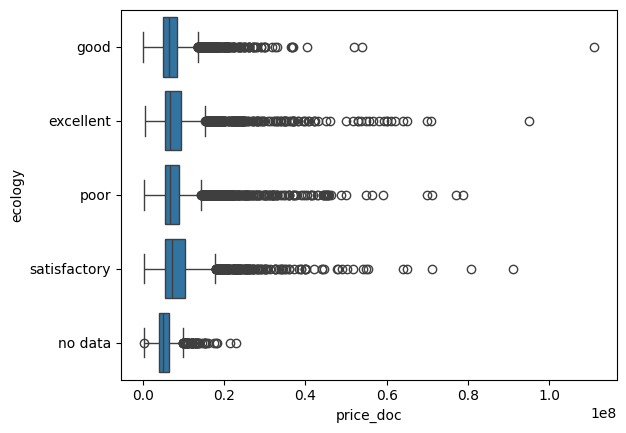

In [30]:
# коробчатые диаграммы зависимости цены жилья от экологии в районе
PD = sber_data['price_doc']
E = sber_data['ecology']
sns.boxplot(x=PD, y=E)
plt.show()

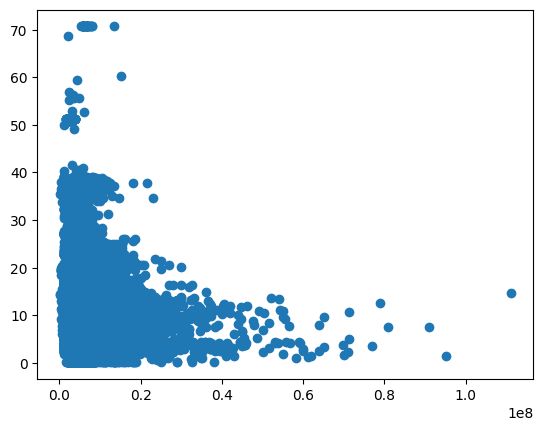

In [35]:
pd = sber_data['price_doc']
kk = sber_data['kremlin_km']
#plt.figure(figsize=(12, 5));
plt.scatter(pd, kk);


# Работа с пропусками

Почему важно обрабатывать пропуски? 
- Преобладающее большинство моделей машинного обучения не умеют обрабатывать пропуски, так как они работают только с числами. Если в данных содержится пустая ячейка таблицы, модель выдаст ошибку.

In [37]:
# посмотрим в пяти последних строках есть ли пропуски 
# там где указано True - пропуск
sber_data.isnull().tail()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
30466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30468,False,False,True,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
30469,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30470,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [41]:
# выведем на экран названия столбцов, где число пропусков больше 0 
# вычислим средний по столбцам результат метода isnull() и получим долю пропусков в каждом столбце
cols_null_percent = sber_data.isnull().mean()*100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
cols_with_null

hospital_beds_raion          47.392603
preschool_quota              21.948738
school_quota                 21.938893
life_sq                      20.947786
floor                         0.548062
metro_min_walk                0.082045
metro_km_walk                 0.082045
railroad_station_walk_km      0.082045
railroad_station_walk_min     0.082045
dtype: float64

Анализируя результаты, можно понять, что столбец, в котором почти половина данных пропущена, не может дать нам полезной информации, а скорее всего даже будет мешать , следовательно, от него стоит избавиться.

А вот столбцы с пропусками < 1% легко можно скорректировать, заполнив отсутствующие значения

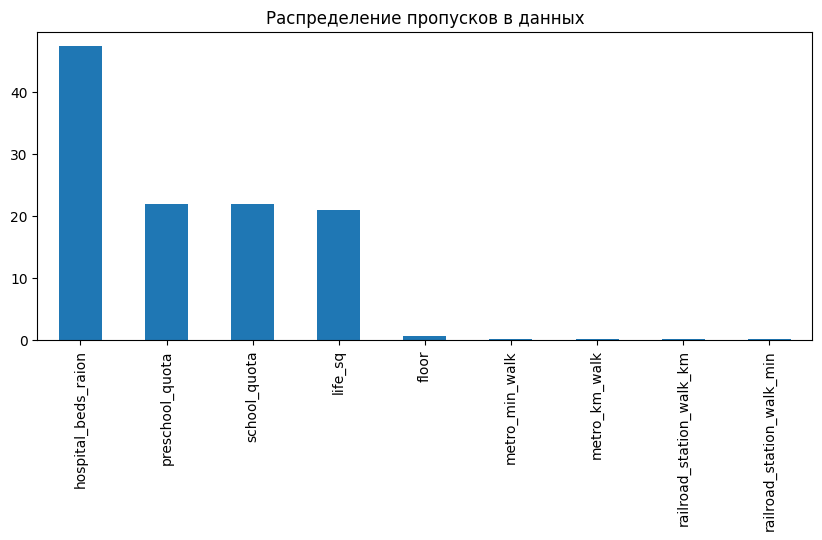

In [43]:
# чтобы оценить соотношение пропусков по столбцам, также можно воспользоваться столбчатой диаграммой

cols_with_null.plot(
    kind='bar', 
    figsize=(10,4),
    title='Распределение пропусков в данных'
);

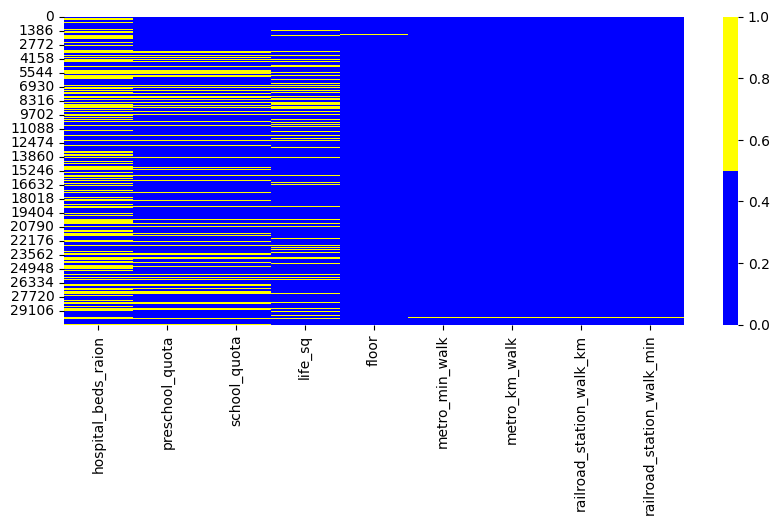

In [44]:
# а еще можно сделать тепловую карту (актуально когда столбцов меньше 10)

#создадим собственную палитру
colors=['blue', 'yellow']
fig= plt.figure(figsize=(10,4))
cols=cols_with_null.index
ax = sns.heatmap(
    sber_data[cols].isnull(),
    cmap=sns.color_palette(colors),
)

# на карте пропуски оторажены желтым 
# мы не видим процентного соотношения пропусков, но видим места их концентрации и взаимосвязи

Как обрабатывать пропуски?

Первое - простое удаление записей (строк), признаков (столбцов) с пропусками. Если процент пропусков в столбце превышает 30-40 %, стоит рассмотреть возможность удаления этого столбца, особенно если данные в нем не являются критически важными для анализа или модели.


In [47]:
# создадим копию исходной таблицы
drop_data = sber_data.copy()
# посчитаем минимальный порог: вычисляем 70% от числа строк
thresh = drop_data.shape[0]*0.7
# удаляем столбцы, в которых более 30% пропусков
drop_data = drop_data.dropna(thresh=thresh, axis=1)
# удаляем записи, в которых есть хотя бы один пропуск
drop_data = drop_data.dropna(how='any', axis=0)
# отображаем результирующую долю пропусков
drop_data.isnull().mean()

id                                       0.0
full_sq                                  0.0
life_sq                                  0.0
floor                                    0.0
sub_area                                 0.0
preschool_quota                          0.0
preschool_education_centers_raion        0.0
school_quota                             0.0
school_education_centers_raion           0.0
school_education_centers_top_20_raion    0.0
healthcare_centers_raion                 0.0
university_top_20_raion                  0.0
sport_objects_raion                      0.0
additional_education_raion               0.0
culture_objects_top_25_raion             0.0
shopping_centers_raion                   0.0
office_raion                             0.0
oil_chemistry_raion                      0.0
railroad_terminal_raion                  0.0
nuclear_reactor_raion                    0.0
metro_min_avto                           0.0
metro_km_avto                            0.0
metro_min_

In [48]:
# и результирующее число записей
drop_data.shape

(20888, 60)

В методе dropna() можно указать axis, how (any- удаляется запись, если хотя бы в одном столбце есть пропуск, all- если во всех столбцах пропуск), thresh (это порог удаления. определяет минимальное число непустых значений в строке или столбце)

Второе, что можно сделать с пропусками - заполнить константами (среднее/ медиана/ мода)


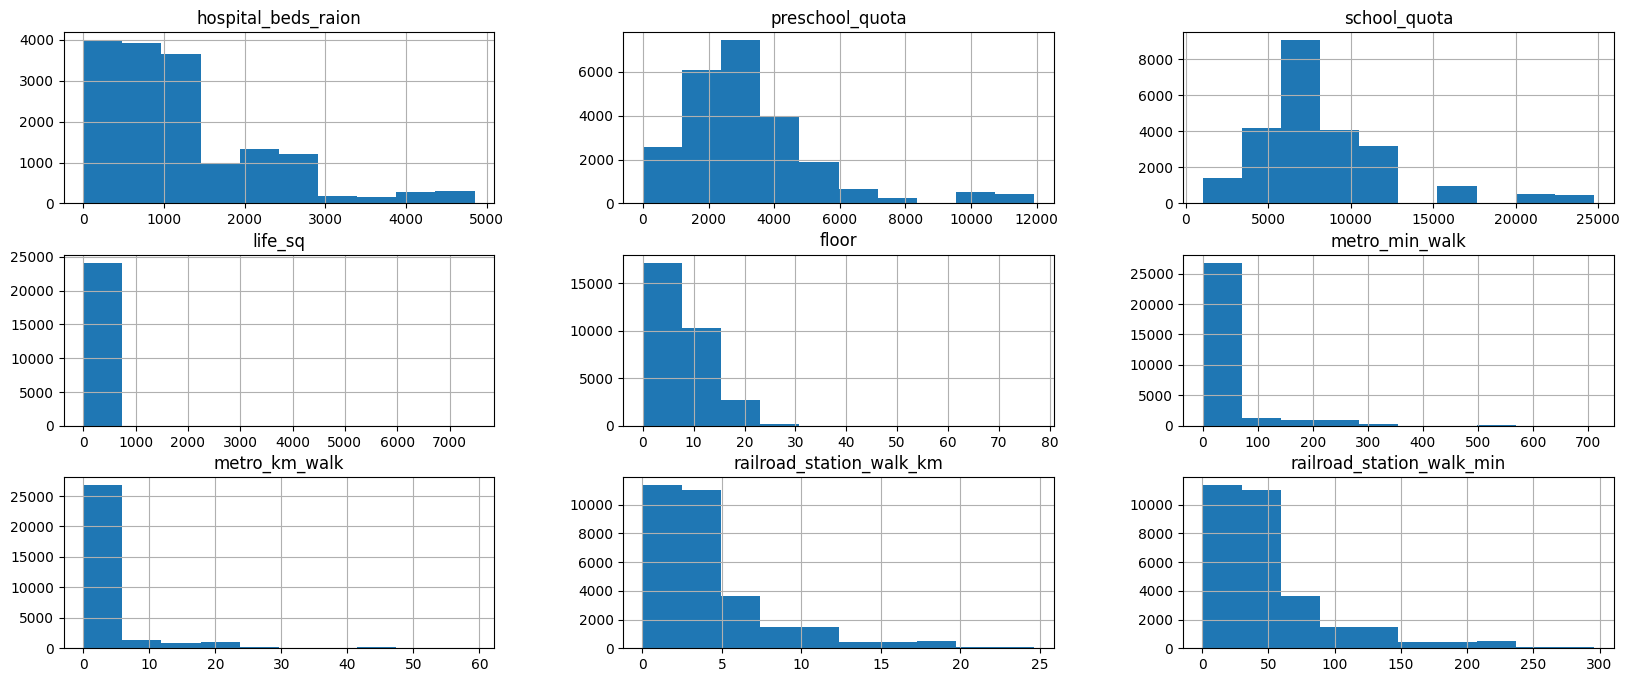

In [49]:
# выведем распределние признаков с пропусками

cols = cols_with_null.index
sber_data[cols].hist(figsize=(20,8));

Рекомендации:
- для распределений, похожих на логнормальное, высока вероятность наличия выбросов. среднее оч чувствительно к выбросам, а  медиана - нет. следовательно в этом случае лучше заполнять пропуски медианой;
- если признак числовой и дискретный, его нельзя заполнять средним или медианой (не может быть 2,56 этажа), следовательно либо вставляет моду на место пропуска, либо округляем до целого среднюю/медиану;
- категориальные признаки заполняются либо наиболее частым значением, либо unknown (если хотим сохранить инфу о пропуске);
- и иногда на основании другого признака (известеного), можно заполнить пропуск.

In [51]:
# создаем копию исходной таблицы
fill_data = sber_data.copy()
# создаем словарь {имя столбца с пропусками : чем будем заполнять}
values ={
    'life_sq': fill_data['full_sq'],
    'metro_min_walk': fill_data['metro_min_walk'].median(),
    'metro_km_walk': fill_data['metro_km_walk'].median(),
    'railroad_station_walk_km': fill_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': fill_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': fill_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': fill_data['preschool_quota'].mode()[0],
    'school_quota': fill_data['school_quota'].mode()[0],
    'floor': fill_data['floor'].mode()[0]
}
# заполняем пропуски в соответствии с заявленным словарем
fill_data = fill_data.fillna(values)
fill_data.isnull().mean()

id                   0.0
full_sq              0.0
life_sq              0.0
floor                0.0
sub_area             0.0
                    ... 
theater_km           0.0
museum_km            0.0
ecology              0.0
mosque_count_1000    0.0
price_doc            0.0
Length: 61, dtype: float64

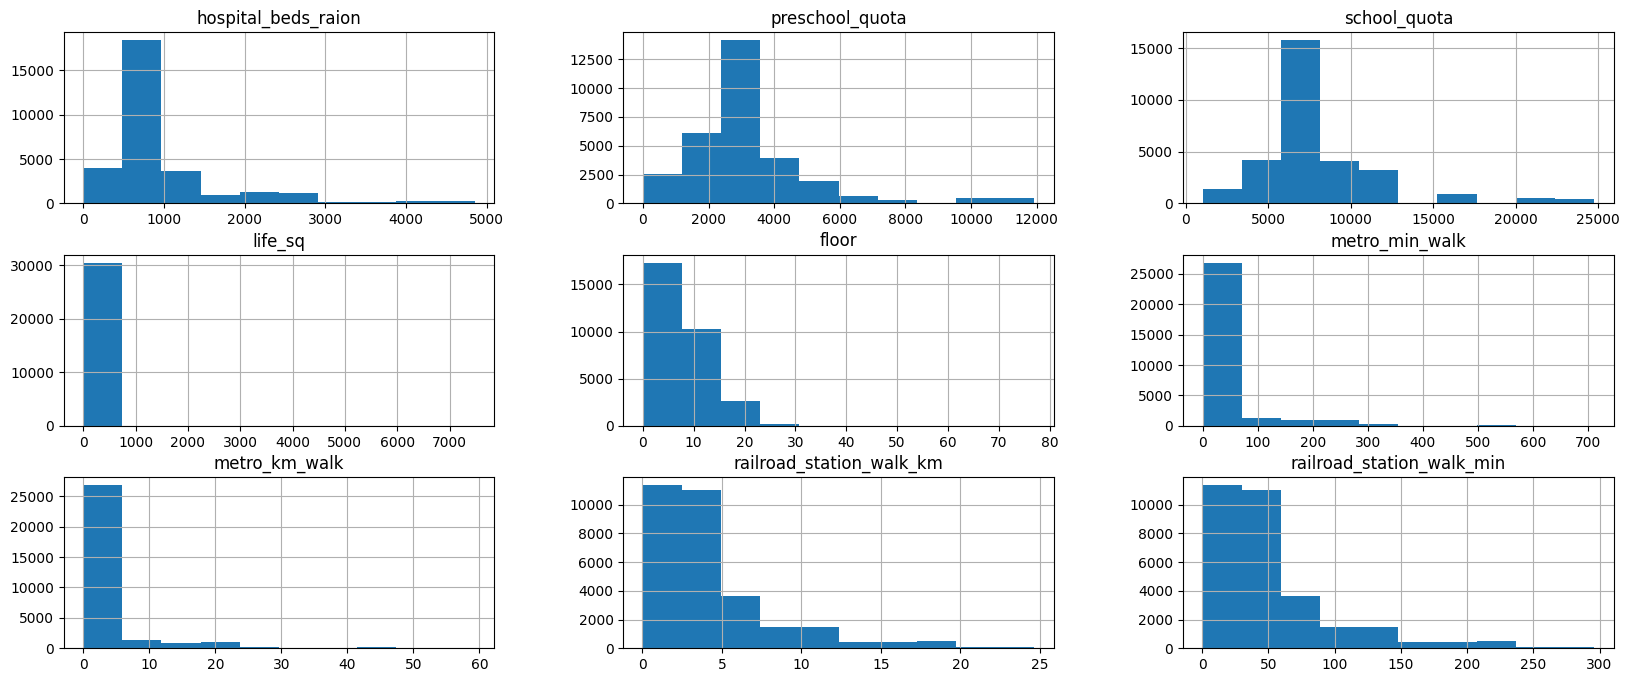

In [52]:
# посмотрим как изменилось распределение признаков после преобразований
cols = cols_with_null.index
fill_data[cols].hist(figsize=(20, 8));

Обратим внимание, что распределение для признака hospital_beds_raion изменилось оч сильно. Это связано с тем, что мы кардинально исказили исходное распределение вставками модальных значений, и мб плохо скажется на модели в дальнейшем

Третий вариант работы с пропусками - это по сути вариация второго - помимо заполнения пропусков константами, мы еще создаем дополнительные столбцы-индикаторы, где в ккаждой строке будет записано True/False в зависимости от того, был ли тут пропуск раньше или нет

In [53]:
#создаем копию исходной таблицы
indicator_data = sber_data.copy()
#в цикле пробегаемся по названиям столбцов с пропусками
for col in cols_with_null.index:
    #создаем новый признак-индикатор как col_was_null
    indicator_data[col + '_was_null'] = indicator_data[col].isnull()
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски   
values = {
    'life_sq': indicator_data['full_sq'],
    'metro_min_walk': indicator_data['metro_min_walk'].median(),
    'metro_km_walk': indicator_data['metro_km_walk'].median(),
    'railroad_station_walk_km': indicator_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': indicator_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': indicator_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': indicator_data['preschool_quota'].mode()[0],
    'school_quota': indicator_data['school_quota'].mode()[0],
    'floor': indicator_data['floor'].mode()[0]
}
#заполняем пропуски в соответствии с заявленным словарем
indicator_data = indicator_data.fillna(values)
#выводим результирующую долю пропусков
indicator_data.isnull().mean()

id                                    0.0
full_sq                               0.0
life_sq                               0.0
floor                                 0.0
sub_area                              0.0
                                     ... 
floor_was_null                        0.0
metro_min_walk_was_null               0.0
metro_km_walk_was_null                0.0
railroad_station_walk_km_was_null     0.0
railroad_station_walk_min_was_null    0.0
Length: 70, dtype: float64

In [54]:
indicator_data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,price_doc,hospital_beds_raion_was_null,preschool_quota_was_null,school_quota_was_null,life_sq_was_null,floor_was_null,metro_min_walk_was_null,metro_km_walk_was_null,railroad_station_walk_km_was_null,railroad_station_walk_min_was_null
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,5850000,False,False,False,False,False,False,False,False,False
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,6000000,False,False,False,False,False,False,False,False,False
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,5700000,False,False,False,False,False,False,False,False,False
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,13100000,True,False,False,False,False,False,False,False,False
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,16331452,False,False,False,False,False,False,False,False,False


Ну и конечно эти подходы можно кобинировать между собой

In [56]:
#создаем копию исходной таблицы
combine_data = sber_data.copy()

#отбрасываем столбцы с числом пропусков более 30 % (100-70)
n = combine_data.shape[0] #число строк в таблице
thresh = n*0.7
combine_data = combine_data.dropna(thresh=thresh, axis=1)
#отбрасываем строки с числом пропусков более 2 в строке
m = combine_data.shape[1] #число признаков после удаления столбцов
combine_data = combine_data.dropna(thresh=m-2, axis=0)

#создаем словарь 'имя_столбца': число (признак), на который надо заменить пропуски 
values = {
    'life_sq': combine_data['full_sq'],
    'metro_min_walk': combine_data['metro_min_walk'].median(),
    'metro_km_walk': combine_data['metro_km_walk'].median(),
    'railroad_station_walk_km': combine_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': combine_data['railroad_station_walk_min'].median(),
    'preschool_quota': combine_data['preschool_quota'].mode()[0],
    'school_quota': combine_data['school_quota'].mode()[0],
    'floor': combine_data['floor'].mode()[0]
}
#заполняем оставшиеся записи константами в соответствии со словарем values
combine_data = combine_data.fillna(values)
#выводим результирующую долю пропусков
display(combine_data.isnull().mean())

id                                       0.0
full_sq                                  0.0
life_sq                                  0.0
floor                                    0.0
sub_area                                 0.0
preschool_quota                          0.0
preschool_education_centers_raion        0.0
school_quota                             0.0
school_education_centers_raion           0.0
school_education_centers_top_20_raion    0.0
healthcare_centers_raion                 0.0
university_top_20_raion                  0.0
sport_objects_raion                      0.0
additional_education_raion               0.0
culture_objects_top_25_raion             0.0
shopping_centers_raion                   0.0
office_raion                             0.0
oil_chemistry_raion                      0.0
railroad_terminal_raion                  0.0
nuclear_reactor_raion                    0.0
metro_min_avto                           0.0
metro_km_avto                            0.0
metro_min_

In [57]:
print(combine_data.shape)

(26800, 60)


Также пропущенные значения можно порой предсказывать с помощью модели (метод KNN или линейная регрессия).
И еще вариант - заполнять, основываясь на группах данных  

In [58]:
# найти общее число пропусков в каждом столбце
sber_data.isnull().sum()

id                      0
full_sq                 0
life_sq              6383
floor                 167
sub_area                0
                     ... 
theater_km              0
museum_km               0
ecology                 0
mosque_count_1000       0
price_doc               0
Length: 61, dtype: int64

# Выбросы

Выбросы можно искать вручную, руководствуячь здравым смыслом (например, что жилая площадь не может быть больше общей площади квартиры). Но это долго и мучительно

Можно искать с помощью метода межквартильного размаха (метод Тьюки)

По этому методу мы сперва должны вычислить 25 и 75 квантили для интересующего нас признака. Затем вычислить межквартильное расстояние (Q75-Q25). Вычислить верхнюю и нижнюю границы Тьюки (Q25 - 1.5IQR и Q75 + 1.5IQR). Найти наблюдения, вышедшие за пределы границ.


In [1]:
# функция принимает на вход датасет и признак, по которому будем искать
def outliers_iqr(data, feature):
    x = data[feature]
    # вычисляем квартили
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    # вычисляем межквартильное расстояние
    iqr = quartile_3 - quartile_1
    # вычисляем границы Тьюки
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    # обозначаем выбросы и очищенные данные, это же и выводим
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [3]:
# применим функцию к нашему датасету и признаку общей площади

outliers, cleaned = outliers_iqr(sber_data, 'full_sq')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 963
Результирующее число записей: 29508


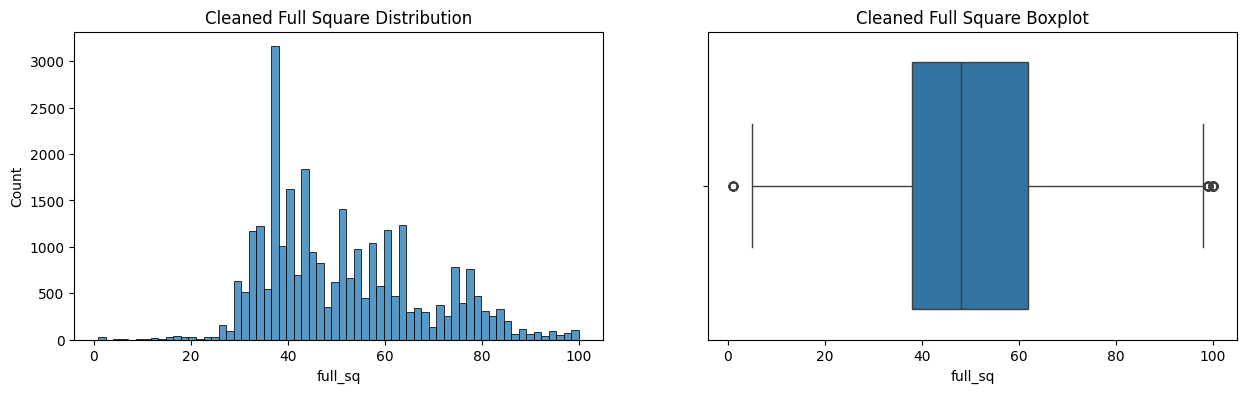

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='full_sq', ax=axes[0]);
histplot.set_title('Cleaned Full Square Distribution');
boxplot = sns.boxplot(data=cleaned, x='full_sq', ax=axes[1]);
boxplot.set_title('Cleaned Full Square Boxplot');

# после очистки данных от выбросов расчитываются новые значения квартилей и тд, поэтому воявляются новые "выбросы" за пределами усов боксплота

!! Стоит понимать, что классический метод межквартильного размаха не учитывает особенностей распределения! Он требует, чтобы данные были распределены плюс-минус НОРМАЛЬНО (гистограмма должна быть похожа на колокол). И требует от распределения примерной симметричности (чтобы у гистограммы были одинаковые хвосты в обе стороны).

А в нашем случае распределение отличается от заявленных критериев: оно не симметрично и не колоколообразно - выбор метода поиска не оправдал себя.

Задание. Давайте немного модифицируем функцию outliers_iqr(data, feature). Добавьте в неё параметры left и right, которые задают число IQR влево и вправо от границ ящика (пусть по умолчанию они равны 1.5). Функция, как и раньше, должна возвращать потенциальные выбросы и очищенный DataFrame.

In [5]:
import pandas as pd
import numpy as np

def outliers_iqr_mod(data, feature, left=1.5, right=1.5):
    if isinstance(data, str):  # Проверка, если передан путь к файлу
        data = pd.read_csv(data)

    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)

    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned


In [6]:
# ослабим границы справа и усилим слева
outliers, cleaned = outliers_iqr_mod(sber_data, 'full_sq', left=1, right=6)
print(outliers.shape[0])
print(cleaned.shape[0])

59
30412


Следующий метод работы с выбросами - метод сигм (метод z-отклонений)

Правило трех сигм гласит: если распределение данных является нормальным, то 99,73 % лежат в интервале (μ — 3σ, μ + 3σ), где μ (мю) — математическое ожидание (для выборки это среднее значение), а σ (сигма) — стандартное отклонение. Наблюдения, которые лежат за пределами этого интервала, будут считаться выбросами.

А что делать, если данные не распределены нормально? На такой случай есть один трюк. Иногда для распределений, похожих на логнормальное, может помочь логарифмирование. Оно может привести исходное распределение к подобию нормального. Причем основание логарифма может быть любым.

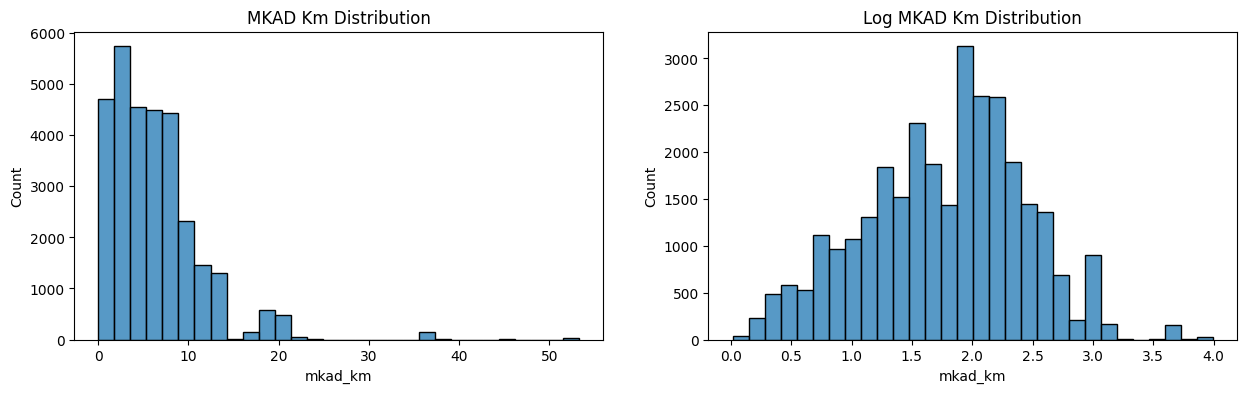

In [7]:
# построим две гистограммы одного признака (удаленности от мкада) - первая в обычном масштабе, вторая - в логарифмическом 
# возьмем натуральный логарифм 
# признак имеет среди своих значений 0. логарифма от 0 не существует, поэтому мы прибавляем к нашему признаку 1, чтобы не логарифмировать нули и не получать предупреждения

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

#гистограмма исходного признака
histplot = sns.histplot(sber_data['mkad_km'], bins=30, ax=axes[0])
histplot.set_title('MKAD Km Distribution');

#гистограмма в логарифмическом масштабе
log_mkad_km= np.log(sber_data['mkad_km'] + 1)
histplot = sns.histplot(log_mkad_km , bins=30, ax=axes[1])
histplot.set_title('Log MKAD Km Distribution');

Распределение (справа) имеет левостороннюю асимметрию, потому что мы видим, что слева от моды (высокий столбик) больше наблюдений, чем справа

In [8]:
# Численный показатель асимметрии можно вычислить с помощью метода skew():

print(log_mkad_km.skew())

-0.14263612203024953


Асимметрия распределения называется правосторонней, если As>0, аналогично - левосторонняя, если As < 0

Чтобы реализовать алгоритм метода z-отклонений, нужно: 1. вычислить математическое ожидание (среднее) и стандартное отклонение (сигма) признака; 2. вычислить верхнюю и нижнюю границы интервала (+- 3 сигмы); 3. найти наблюдения, вышедшие за границы

In [9]:
# пишем функцию, которая на вход принимает датасет, признак, а также добавляем возможность работы в логарифмическом масштабе - если false, не логарифмируем
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [10]:
outliers, cleaned = outliers_z_score(sber_data, 'mkad_km', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 33
Результирующее число записей: 30438


In [11]:
# узнаем в каких районах нашлось 33 выброса
print(outliers['sub_area'].unique())

['Poselenie Rogovskoe' 'Poselenie Kievskij']


Тут надо обратиться к интернету, погуглить, где находятся эти поселения и действительно ли это выбросы (спойлер: и да, и нет)

Стоит еще повнимательнее посмотреть на распределение этого признака, может присутствует асимметрия

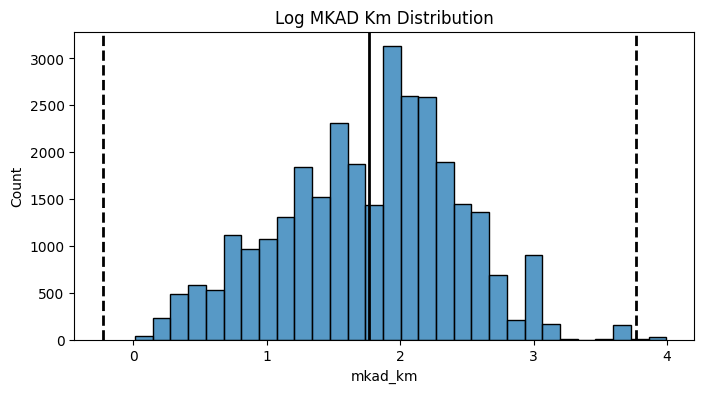

In [12]:
# с помощью метода axvline() проведем вертикальные линии, соответствующие среднему и границам интервала на графике
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_mkad_km = np.log(sber_data['mkad_km'] + 1)
histplot = sns.histplot(log_mkad_km, bins=30, ax=ax)
histplot.axvline(log_mkad_km.mean(), color='k', lw=2)
histplot.axvline(log_mkad_km.mean()+ 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.axvline(log_mkad_km.mean()- 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.set_title('Log MKAD Km Distribution');

 Легко заметить, что среднее значение (жирная вертикальная линия) находится левее моды, это свойство распределений с левосторонней асимметрией.

 Также видны наблюдения, которые мы не захватили своим интервалом (небольшой пенек правее верхней границы) — это и есть наши квартиры из поселений Роговское и Киевский. Очевидно, что если немного (меньше, чем на одну сигму) «сдвинуть» верхнюю границу вправо, мы захватим эти наблюдения. Попробуем сделать это.

In [13]:
def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [22]:
outliers, cleaned = outliers_z_score_mod(sber_data, 'mkad_km', log_scale=True, left=2.7, right=3.4)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 0
Результирующее число записей: 30471


Дав послабление на правую границу в размере меньше, чем 1 сигма, мы получили ноль выбросов

Как итог, можно сказать, что методы межквартильного размаха и z-отклонений хороши, но работают только для нормально распределенных признаков. Соответственно, если мы ими пользуемся, надо подогнать распределение.

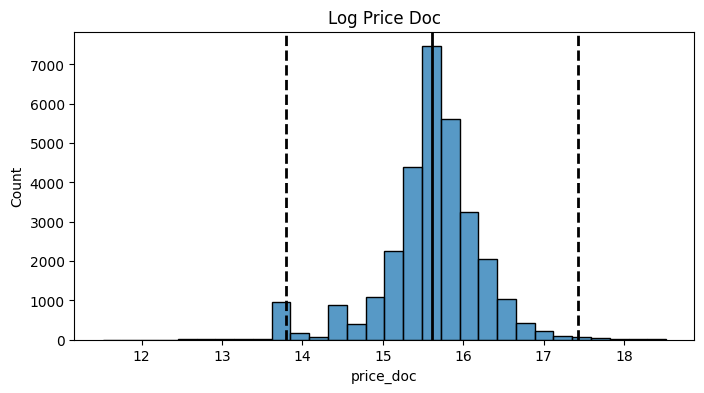

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_price_doc = np.log(sber_data['price_doc'] + 1)
histplot = sns.histplot(log_price_doc, bins=30, ax=ax)
histplot.axvline(log_price_doc.mean(), color='k', lw=2)
histplot.axvline(log_price_doc.mean()+ 3 * log_price_doc.std(), color='k', ls='--', lw=2)
histplot.axvline(log_price_doc.mean()- 3 * log_price_doc.std(), color='k', ls='--', lw=2)
histplot.set_title('Log Price Doc');

In [25]:
outliers, cleaned = outliers_z_score_mod(sber_data, 'price_doc', log_scale=True, left=3.7, right=3.7)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 52
Результирующее число записей: 30419


In [43]:
# добавим фишку с логарифмированием в функцию с межквартильным размахом 
def outliers_iqr_mod(data, feature, log_scale=False, left=1.5, right=1.5):
    if isinstance(data, str):  # Проверка, если передан путь к файлу
        data = pd.read_csv(data)
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75)
    iqr = quartile_3 - quartile_1        
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)

    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned


In [28]:
outliers, cleaned = outliers_iqr_mod(sber_data, 'price_doc', log_scale=True, left=3, right=3)
print(outliers.shape[0])
print(cleaned.shape[0])

92
30379


# Дубликаты и неинформативные признаки

In [29]:
# сперва можно проверить, что не задублировались записи (строки) целиком. Сделаем это по подсчету уникальных id-шек

sber_data['id'].nunique() == sber_data.shape[0]

# возвращается true, а это значит, что дубликатов целых строк не было

True

In [30]:
# с помощью метода duplicated() можно найти ПОЛНЫЕ дубликаты 
# сперва создадим список столбцов, по которым будем искать совпадения

dupl_columns = list(sber_data.columns)
# удаляем столбец id, потому что его уже проверили
dupl_columns.remove('id')

# создадим маску дубликатов (параметр subset - список признаков, по которым будет производится поиск; по умолчанию используются все столбцы)
mask = sber_data.duplicated(subset=dupl_columns)
sber_duplicates = sber_data[mask]
print(f'Число найденных дубликатов: {sber_duplicates.shape[0]}')

Число найденных дубликатов: 562


In [31]:
# с помощью метода drop_duplicates() мы удаляем повторяющиеся записи
sber_dedupped = sber_data.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {sber_dedupped.shape[0]}')

Результирующее число записей: 29909


Чтобы считать признак неинформативным, прежде всего нужно задать какой-то определенный «порог информативности». Например, часто используют пороги в 0.95 и 0.99. Это означает: признак неинформативен, если в нем 95 % (99 %) одинаковых значений или же 95 % (99 %) данных полностью уникальны.

Алгоритм поиска неинформативных признаков: 

In [32]:
#список неинформативных признаков
low_information_cols = [] 

#цикл по всем столбцам
for col in sber_data.columns:
    #наибольшая относительная частота в признаке
    top_freq = sber_data[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = sber_data[col].nunique() / sber_data[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

id: 100.0% уникальных значений
oil_chemistry_raion: 99.03% одинаковых значений
railroad_terminal_raion: 96.27% одинаковых значений
nuclear_reactor_raion: 97.17% одинаковых значений
big_road1_1line: 97.44% одинаковых значений
mosque_count_1000: 98.08% одинаковых значений


In [33]:
# теперь можно удалить неинформативные признаки
information_sber_data = sber_data.drop(low_information_cols, axis=1)
print(f'Результирующее число признаков: {information_sber_data.shape[1]}')

Результирующее число признаков: 55


На самом деле информативность признаков определяется не только числом уникальных значений, но и их влиянием на целевой признак (тот, который мы хотим предсказать). Это называется важностью признака. 

Признаки, которые обладают низкой важностью, называют нерелевантными признаками.

# Закрепление знаний

In [1]:
import pandas as pd
diabetes = pd.read_csv('data/diabetes_data.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female


In [2]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               778 non-null    int64  
 1   Glucose                   778 non-null    int64  
 2   BloodPressure             778 non-null    int64  
 3   SkinThickness             778 non-null    int64  
 4   Insulin                   778 non-null    int64  
 5   BMI                       778 non-null    float64
 6   DiabetesPedigreeFunction  778 non-null    float64
 7   Age                       778 non-null    int64  
 8   Outcome                   778 non-null    int64  
 9   Gender                    778 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 60.9+ KB


In [3]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000
mean,3.848329,120.822622,69.035990,20.457584,79.521851,31.982262,0.470871,33.317481,0.344473
std,3.360782,31.883264,19.432323,15.954452,114.862405,7.853917,0.330669,11.816300,0.475502
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.241500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,27.000000,32.000000,0.370000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,126.750000,36.500000,0.625500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
mask = diabetes.duplicated()
diabetes_dupl = diabetes[mask]
diabetes_dupl.shape[0]

10

In [5]:
diabetes_dedupped = diabetes.drop_duplicates()
diabetes_dedupped.shape[0]

768

In [6]:
low_inform_cols = []

for col in diabetes.columns:
    nunique_r = diabetes[col].nunique()/diabetes[col].count()
    top_fr = diabetes[col].value_counts(normalize=True).max()
    if nunique_r > 0.95:
        low_inform_cols.append(col)
        print(f'{col}:{round(nunique_r* 100, 2)}% уникальных значений')
    if top_fr > 0.95:
        low_inform_cols.append(col)
        print(f'{col}:{round(top_fr*100,2)}% одинаковых значений')


Gender:100.0% одинаковых значений


In [7]:
diabetes = diabetes.drop_duplicates()
diabetes = diabetes.drop(low_inform_cols,axis=1)


In [8]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [9]:
diabetes_null_percent = diabetes.isnull().mean()*100
diabetes_with_null = diabetes_null_percent[diabetes_null_percent>0].sort_values(ascending=True)
diabetes_with_null
# результат поиска - нулевой. якобы нет пропусков в таблице. но на самом деле они есть, просто на месте пропусков - нули


Series([], dtype: float64)

In [10]:
import numpy as np

In [11]:
# создадим функцию, которая будет менять значение, равное нулю, на np.nan или возвращать само значение
def replace_zero(elem):
    
    if elem == 0:
        return np.nan
    else:
        return elem

In [12]:
# применим функцию на пять следующих столбцов
diabetes['Glucose'] = diabetes['Glucose'].apply(replace_zero)
diabetes['BloodPressure'] = diabetes['BloodPressure'].apply(replace_zero)
diabetes['SkinThickness'] = diabetes['SkinThickness'].apply(replace_zero)
diabetes['Insulin'] = diabetes['Insulin'].apply(replace_zero)
diabetes['BMI'] = diabetes['BMI'].apply(replace_zero)
diabetes.sample(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
446,7,119.0,NaN,NaN,NaN,25.2,0.209,37,0
313,1,97.0,64.0,19.0,82.0,18.2,0.299,21,0
50,4,94.0,65.0,22.0,NaN,24.7,0.148,21,0
716,1,108.0,88.0,19.0,NaN,27.1,0.400,24,0
114,1,112.0,72.0,30.0,176.0,34.4,0.528,25,0
63,12,92.0,62.0,7.0,258.0,27.6,0.926,44,1
546,1,116.0,78.0,29.0,180.0,36.1,0.496,25,0
727,1,87.0,68.0,34.0,77.0,37.6,0.401,24,0
284,7,106.0,92.0,18.0,NaN,22.7,0.235,48,0
706,1,181.0,64.0,30.0,180.0,34.1,0.328,38,1


In [21]:
# какая доля пропусков в столбце Insulin
nana = diabetes['Insulin'].isnull().mean()
print(f'Доля пропусков в столбце Insulin составляет {round(nana, 2)}')
# 0.49

KeyError: 'Insulin'

In [20]:
# удалим из данных признаки, где пропусков более 30%
thresh = diabetes.shape[0]*0.7
diabetes = diabetes.dropna(thresh=thresh, axis=1)
print(f'Конечное число признаков в таблице: {diabetes.shape[1]}')

Конечное число признаков в таблице: 8


In [19]:
# удалим те строки, где встречается более 2 пропусков одновременно
m = diabetes.shape[1]
diabetes = diabetes.dropna(thresh = m-2, axis=0)
print(f'Результирующее число записей в таблице: {diabetes.shape[0]}')

Результирующее число записей в таблице: 761


In [24]:
# посмотрим в каких столбцах еще есть пропуски
mask = diabetes.isnull().mean()
w = mask[mask>0].sort_values(ascending=True)
w

BMI              0.005256
Glucose          0.006570
BloodPressure    0.036794
SkinThickness    0.289093
dtype: float64

In [26]:
values ={
    'BMI': diabetes['BMI'].median(),
    'Glucose': diabetes['Glucose'].median(),
    'BloodPressure': diabetes['BloodPressure'].median(),
    'SkinThickness': diabetes['SkinThickness'].median()
}
# заполняем пропуски в соответствии с заявленным словарем
diabetes = diabetes.fillna(values)

# посчитаем чему равно среднее значение в столбце SkinThickness
diabetes['SkinThickness'].mean()

np.float64(29.109067017082786)

In [29]:
# поищем выбросы при помощи метода межквартильного размаха

def outliers_iqr(data, feature):
    x = data[feature]
    quartile1, quartile3 = x.quantile(0.25), x.quantile(0.75)
    iqr = quartile3 - quartile1
    lower_b = quartile1 - 1.5 * iqr
    upper_b = quartile3 + 1.5 * iqr
    outliers = data[(x<lower_b) | (x>upper_b)]
    cleaned = data[(x>lower_b) & (x<upper_b)]
    return outliers, cleaned

In [32]:
outliers, cleaned = outliers_iqr(diabetes, 'SkinThickness')
print(f'Количество выбросов: {outliers.shape[0]}')
print(f'Очищенный датасет: {cleaned.shape[0]}')

Количество выбросов: 87
Очищенный датасет: 674


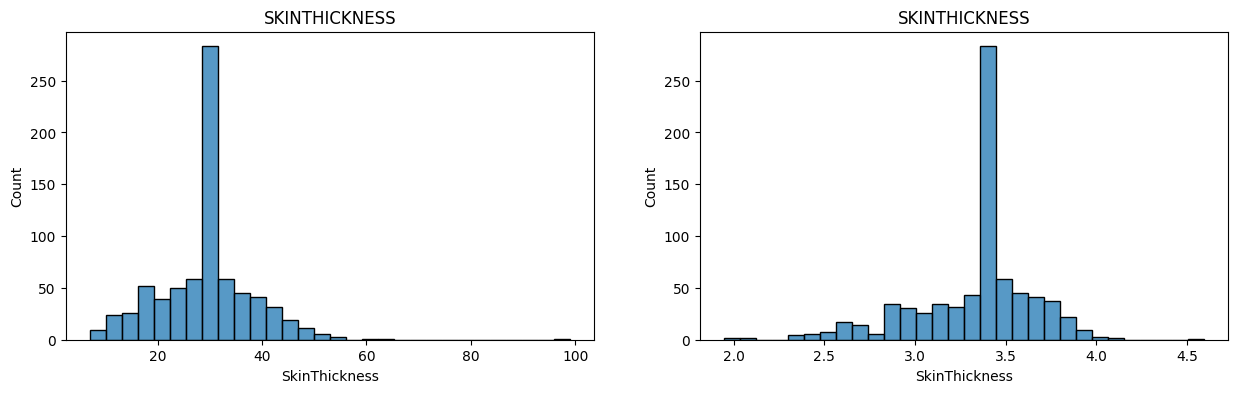

In [37]:
# посмотрим распределение признака SkinThickness


fig, axes = plt.subplots(1, 2, figsize=(15, 4))

#гистограмма исходного признака
histplot = sns.histplot(diabetes['SkinThickness'], bins=30, ax=axes[0])
histplot.set_title('SKINTHICKNESS');

#гистограмма в логарифмическом масштабе
log_skin= np.log(diabetes['SkinThickness'])
histplot = sns.histplot(log_skin, bins=30, ax=axes[1])
histplot.set_title('SKINTHICKNESS');

In [38]:
# теперь поищем z-методом 
# логарифмировать здесь не понадобилось

def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [40]:
outliers, cleaned = outliers_z_score(diabetes, 'SkinThickness')
print(f'Количество выбросов: {outliers.shape[0]}')
print(f'Очищенный датасет: {cleaned.shape[0]}')

Количество выбросов: 4
Очищенный датасет: 757


In [41]:
outliers, cleaned = outliers_iqr(diabetes, 'DiabetesPedigreeFunction')
print(f'Количество выбросов: {outliers.shape[0]}')
print(f'Очищенный датасет: {cleaned.shape[0]}')

Количество выбросов: 29
Очищенный датасет: 732


In [44]:
# посмотрим выбросы по тому же  признаку, но в логарифмическом масштабе
# разница между цифрами составляет 29
outliers, cleaned = outliers_iqr_mod(diabetes, 'DiabetesPedigreeFunction', log_scale=True)
print(f'Количество выбросов: {outliers.shape[0]}')
print(f'Очищенный датасет: {cleaned.shape[0]}')

Количество выбросов: 0
Очищенный датасет: 761
